<a href="https://colab.research.google.com/github/Thevaibhavraina/SPIT-LAB/blob/Data-Analysis/exp9_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix 
 
%matplotlib inline 

In [2]:
# We'll define a function to draw a nice plot of an SVM
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
    # Support vectors indicated in plot by vertical lines
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='x', s=100, linewidths='1')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)

In [3]:
from sklearn.svm import SVC

**Non-Linear**

In [4]:
import pandas as pd
import numpy as np

In [6]:
data = pd.read_csv("Social_Network_Ads.csv",index_col=[0])
data = data.drop(['Gender'],axis=1)

In [7]:
X = data.loc[:,['Age','EstimatedSalary']]
y = data.iloc[:,-1]

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [10]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
# classifier = SVC(kernel = 'linear', random_state = 0) #This is for linear
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [11]:
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(X_test)
print('Accuracy of the model is %.2f%%' %(accuracy_score(y_test, y_pred)*100))

Accuracy of the model is 93.00%


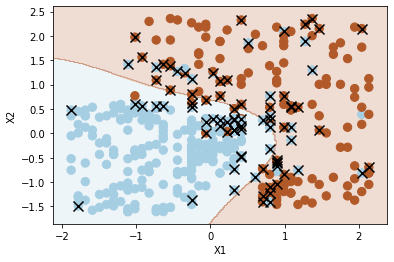

Number of support vectors:  87


In [12]:
  plot_svc(classifier,X,y)

**Linear SVM**

Text(0, 0.5, 'X2')

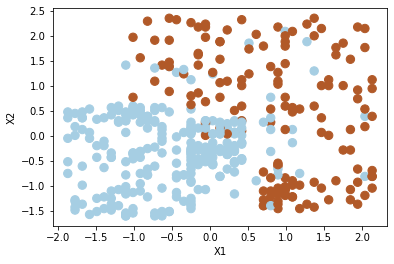

In [13]:
plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

In [14]:
svc = SVC(C=1, kernel='linear')
svc.fit(X, y)

SVC(C=1, kernel='linear')

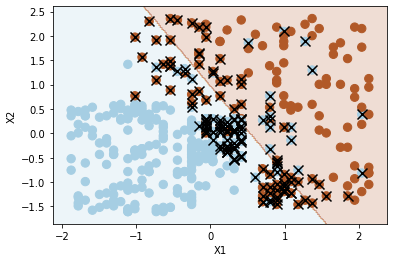

Number of support vectors:  157


In [15]:
plot_svc(svc, X, y)

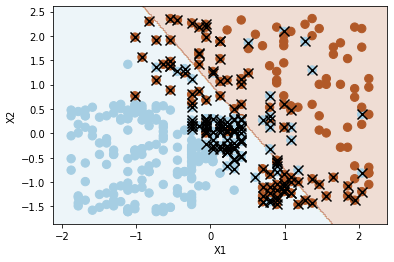

Number of support vectors:  178


In [16]:
svc2 = SVC(C=0.1, kernel='linear')
svc2.fit(X, y)
plot_svc(svc2, X, y)

In [17]:
from sklearn.model_selection import GridSearchCV

# Select the optimal C parameter by cross-validation
tuned_parameters = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}]
clf = GridSearchCV(SVC(kernel='linear'), tuned_parameters, cv=10, scoring='accuracy')
clf.fit(X, y)
     

GridSearchCV(cv=10, estimator=SVC(kernel='linear'),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}],
             scoring='accuracy')

In [18]:
clf.cv_results_

{'mean_fit_time': array([0.00331838, 0.00300581, 0.00284843, 0.00390785, 0.00673358,
        0.00797772, 0.02675982]),
 'std_fit_time': array([0.00027509, 0.00014631, 0.00038521, 0.00098574, 0.00055982,
        0.00079656, 0.00620172]),
 'mean_score_time': array([0.00073178, 0.00073006, 0.00074117, 0.00089326, 0.00114141,
        0.00115767, 0.00122654]),
 'std_score_time': array([5.17639680e-05, 1.56477710e-04, 2.75971520e-04, 2.30678747e-04,
        3.02750667e-05, 4.03828150e-05, 8.49654542e-05]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 5, 10, 100],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 5},
  {'C': 10},
  {'C': 100}],
 'split0_test_score': array([0.65 , 0.675, 0.675, 0.675, 0.675, 0.675, 0.675]),
 'split1_test_score': array([0.65 , 0.675, 0.675, 0.675, 0.675, 0.675, 0.675]),
 'split2_test_score': array([0.65 , 0.9 

In [19]:
clf.best_params_

{'C': 1}

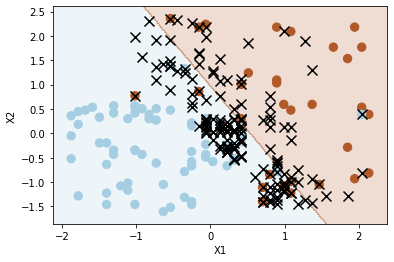

Number of support vectors:  157
[[66  2]
 [ 8 24]]
0.9


In [20]:
plot_svc(clf.best_estimator_, X_test, y_test)
print(confusion_matrix(y_test, clf.best_estimator_.predict(X_test)))
print(clf.best_estimator_.score(X_test, y_test))

Text(0, 0.5, 'X2')

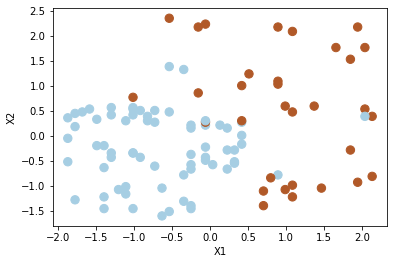

In [21]:
plt.scatter(X_test[:,0], X_test[:,1], s=70, c=y_test, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')
     

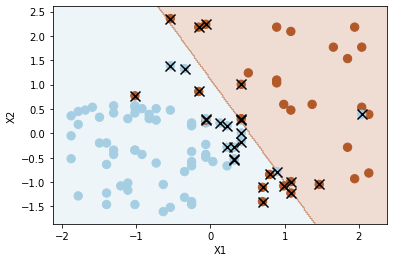

Number of support vectors:  29


In [22]:
svc3 = SVC(C=1e5, kernel='linear')
svc3.fit(X_test, y_test)
plot_svc(svc3, X_test, y_test)

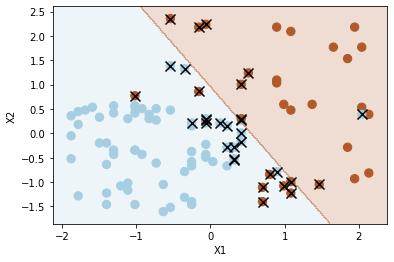

Number of support vectors:  32


In [23]:
svc4 = SVC(C=1, kernel='linear')
svc4.fit(X_test, y_test)
plot_svc(svc4, X_test, y_test)

**Non-linear SVM**

Text(0, 0.5, 'X2')

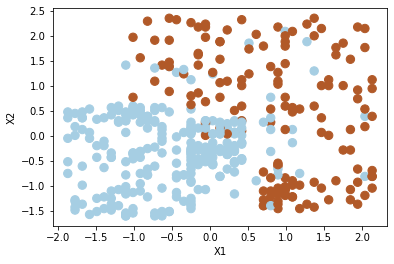

In [24]:
from sklearn.model_selection import train_test_split

# np.random.seed(8)
# X = np.random.randn(200,2)
# X[:100] = X[:100] +2
# X[101:150] = X[101:150] -2
# y = np.concatenate([np.repeat(-1, 150), np.repeat(1,50)])

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=2)

plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

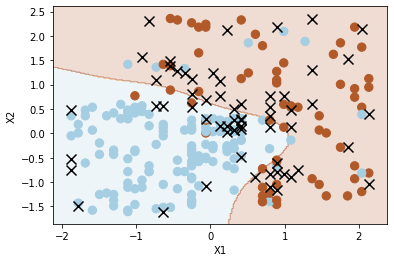

Number of support vectors:  62


In [25]:
svm = SVC(C=1.0, kernel='rbf', gamma=1)
svm.fit(X_train, y_train)
plot_svc(svm, X_test, y_test)

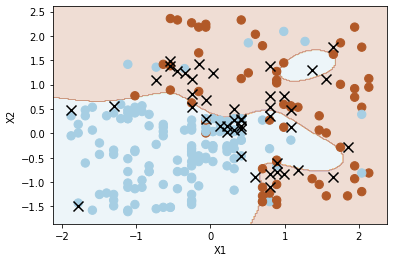

Number of support vectors:  45


In [26]:
# Increasing C parameter, allowing more flexibility
svm2 = SVC(C=100, kernel='rbf', gamma=1.0)
svm2.fit(X_train, y_train)
plot_svc(svm2, X_test, y_test)

In [27]:
tuned_parameters = [{'C': [0.01, 0.1, 1, 10, 100],
                     'gamma': [0.5, 1,2,3,4]}]
clf = GridSearchCV(SVC(kernel='rbf'), tuned_parameters, cv=10, scoring='accuracy')
clf.fit(X_train, y_train)
clf.best_params_
     

{'C': 1, 'gamma': 2}

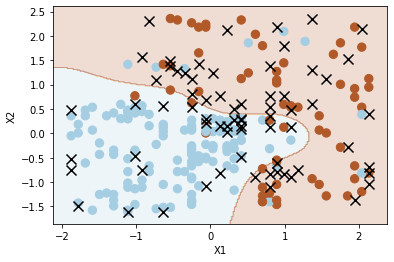

Number of support vectors:  70
[[125  10]
 [  9  56]]
0.905


In [28]:
plot_svc(clf.best_estimator_, X_test, y_test)
print(confusion_matrix(y_test, clf.best_estimator_.predict(X_test)))
print(clf.best_estimator_.score(X_test, y_test))
     

**ROC curve**

In [29]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

In [30]:
# More constrained model
svm3 = SVC(C=1, kernel='rbf', gamma=1)
svm3.fit(X_train, y_train)

SVC(C=1, gamma=1)

In [31]:
# More flexible model
svm4 = SVC(C=1, kernel='rbf', gamma=50)
svm4.fit(X_train, y_train)

SVC(C=1, gamma=50)

In [32]:
y_train_score3 = svm3.decision_function(X_train)
y_train_score4 = svm4.decision_function(X_train)
     

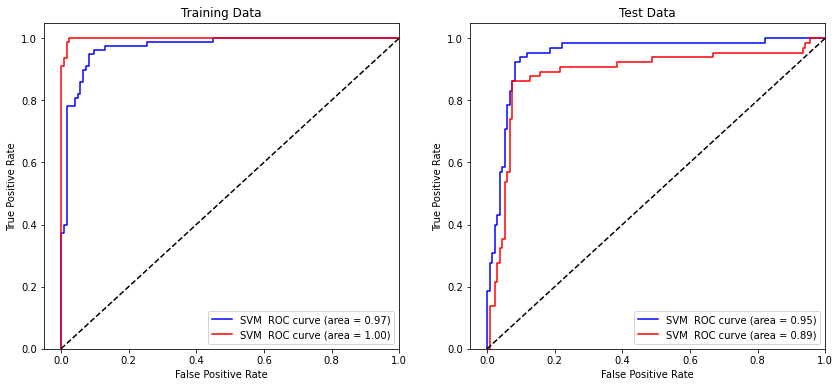

In [33]:
y_train_score3 = svm3.decision_function(X_train)
y_train_score4 = svm4.decision_function(X_train)

false_pos_rate3, true_pos_rate3, _ = roc_curve(y_train, y_train_score3)
roc_auc3 = auc(false_pos_rate3, true_pos_rate3)

false_pos_rate4, true_pos_rate4, _ = roc_curve(y_train, y_train_score4)
roc_auc4 = auc(false_pos_rate4, true_pos_rate4)

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(14,6))
ax1.plot(false_pos_rate3, true_pos_rate3, label='SVM  ROC curve (area = %0.2f)' % roc_auc3, color='b')
ax1.plot(false_pos_rate4, true_pos_rate4, label='SVM  ROC curve (area = %0.2f)' % roc_auc4, color='r')
ax1.set_title('Training Data')

y_test_score3 = svm3.decision_function(X_test)
y_test_score4 = svm4.decision_function(X_test)

false_pos_rate3, true_pos_rate3, _ = roc_curve(y_test, y_test_score3)
roc_auc3 = auc(false_pos_rate3, true_pos_rate3)

false_pos_rate4, true_pos_rate4, _ = roc_curve(y_test, y_test_score4)
roc_auc4 = auc(false_pos_rate4, true_pos_rate4)

ax2.plot(false_pos_rate3, true_pos_rate3, label='SVM  ROC curve (area = %0.2f)' % roc_auc3, color='b')
ax2.plot(false_pos_rate4, true_pos_rate4, label='SVM  ROC curve (area = %0.2f)' % roc_auc4, color='r')
ax2.set_title('Test Data')

for ax in fig.axes:
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([-0.05, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc="lower right")
     
